<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/6-decision-trees/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Decision Trees

Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks. They are
powerful algorithms, capable of fitting complex datasets.

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.



##Setup

In [16]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import export_graphviz

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from graphviz import Source
from matplotlib.colors import ListedColormap

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

##Training and Visualizing a Decision Tree

To understand Decision Trees, let’s build one and take a look at how it makes predictions.

The following code trains a DecisionTreeClassifier on the iris dataset.

In [3]:
iris = load_iris()

X = iris.data[:, 2:]  # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

You can visualize the trained Decision Tree by first using the `export_graphviz()`
method to output a graph definition file called `iris_tree.dot`:

In [4]:
export_graphviz(tree_clf,
                out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Then you can use the Source from the Graphviz package to convert
this .dot file to a variety of formats, such as PDF or PNG.

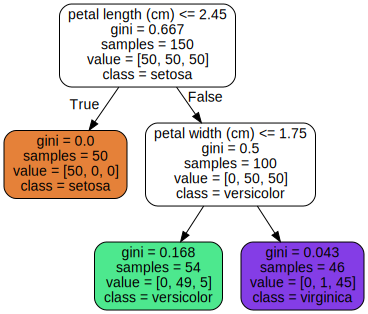

In [5]:
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

##Making Predictions

**A node’s samples attribute counts how many training instances it applies to**. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left).

**A node’s value attribute tells you how many training instances of each class this node applies to:** for example, the bottom-right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.

Finally, **a node’s gini attribute measures its impurity: a node is
“pure” (gini=0) if all training instances it applies to belong to the same class.** For
example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its gini score is 0.

So, you can think, how the training algorithm computes
the gini score Gi of the ith node. The depth-2 left node has a gini score equal to $1 – (0/54)^2 – (49/54)^2 – (5/54)^2 \approx 0.168$.

$$
G_i=1 - \sum_{k=1}^n P_{i, k}^2
$$

>$p_{i,k} is the ratio of class $k$ instances among the training instances in the ith node.


Let's see this Decision Tree’s decision boundaries. The thick vertical line represents
the decision boundary of the root node (depth 0): petal length = 2.45 cm.
Since the lefthand area is pure (only Iris setosa), it cannot be split any further. However,
the righthand area is impure, so the depth-1 right node splits it at petal width =
1.75 cm (represented by the dashed line).



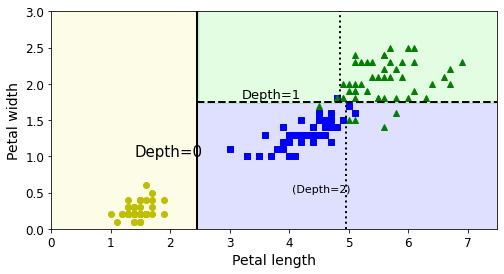

In [6]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

Since max_depth was set to 2, the Decision Tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would
each add another decision boundary (represented by the dotted lines).

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
export_graphviz(tree_clf,
                out_file=os.path.join(IMAGES_PATH, "iris_tree2.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

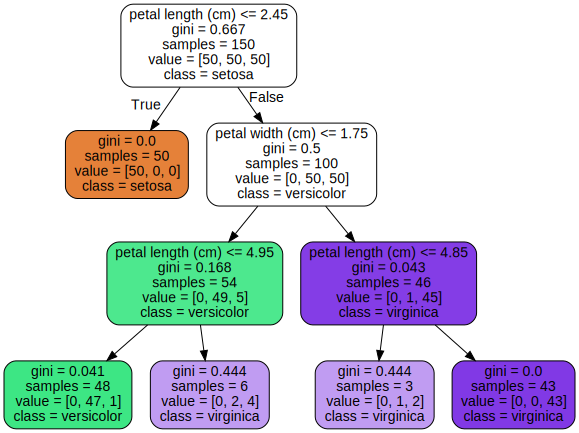

In [9]:
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree2.dot"))

##Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular
class k. First it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node.

For example, suppose
you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output
the following probabilities:

 `0% for Iris setosa (0/54), 
  90.7% for Iris versicolor (49/54),
  and 
  9.3% for Iris virginica (5/54)`. 

And if you ask it to predict the class, it should output
Iris versicolor (class 1) because it has the highest probability.

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([2])

Perfect! Notice that the estimated probabilities would be identical anywhere else in
the bottom-right rectangle, if the petals were 6 cm long
and 1.5 cm wide (even though it seems obvious that it would most likely be an Iris
virginica in this case).

In [12]:
tree_clf.predict_proba([[6, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [13]:
tree_clf.predict([[6, 1.5]])

array([2])

##Regularization Hyperparameters

Decision Trees make very few assumptions about the training data (as opposed to linear
models, which assume that the data is linear, for example). If left unconstrained,
the tree structure will adapt itself to the training data, fitting it very closely—indeed,
most likely overfitting it. 

Such a model is often called a nonparametric model, not
because it does not have any parameters (it often has a lot) but because the number of
parameters is not determined prior to training, so the model structure is free to stick
closely to the data. 

In contrast, a parametric model, such as a linear model, has a predetermined
number of parameters, so its degree of freedom is limited, reducing the
risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree.

Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize
the model.

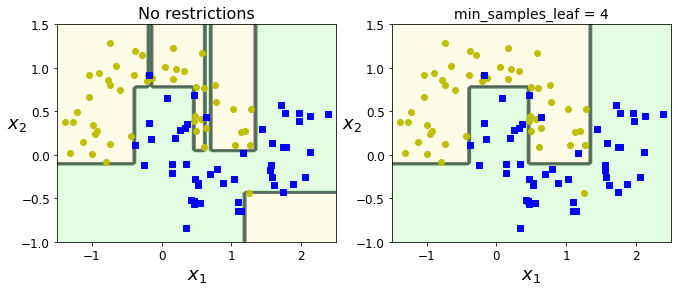

In [14]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

On the left the Decision Tree is trained with the default `hyperparameters`
(i.e., no restrictions), and on the right it’s trained with `min_samples_leaf=4`. It is
quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

##Regression

Decision Trees are also capable of performing regression tasks. 

Let’s build a regression
tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy
quadratic dataset with `max_depth=2`:

In [15]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [17]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [27]:
export_graphviz(tree_reg,
                out_file=os.path.join(IMAGES_PATH, "tree_reg.dot"),
                feature_names=["x1"],
                rounded=True,
                filled=True)

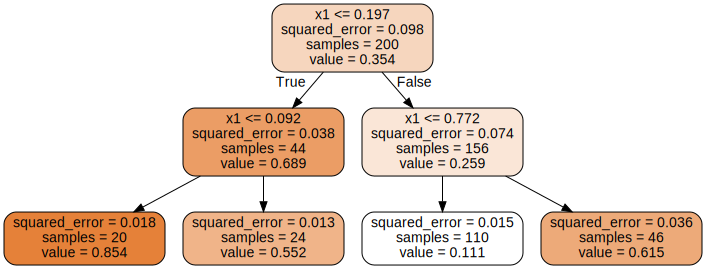

In [28]:
Source.from_file(os.path.join(IMAGES_PATH, "tree_reg.dot"))

This tree looks very similar to the classification tree you built earlier. The main difference
is that instead of predicting a class in each node, it predicts a value.

If you set
`max_depth=3`, you get the predictions represented on the right. Notice how the predicted
value for each region is always the average target value of the instances in that
region. The algorithm splits each region in a way that makes most training instances
as close as possible to that predicted value.

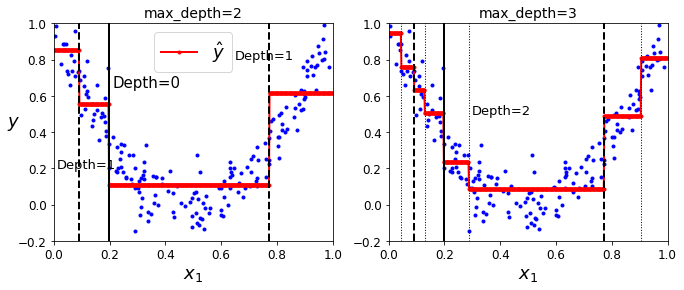

In [23]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [29]:
export_graphviz(
        tree_reg2,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

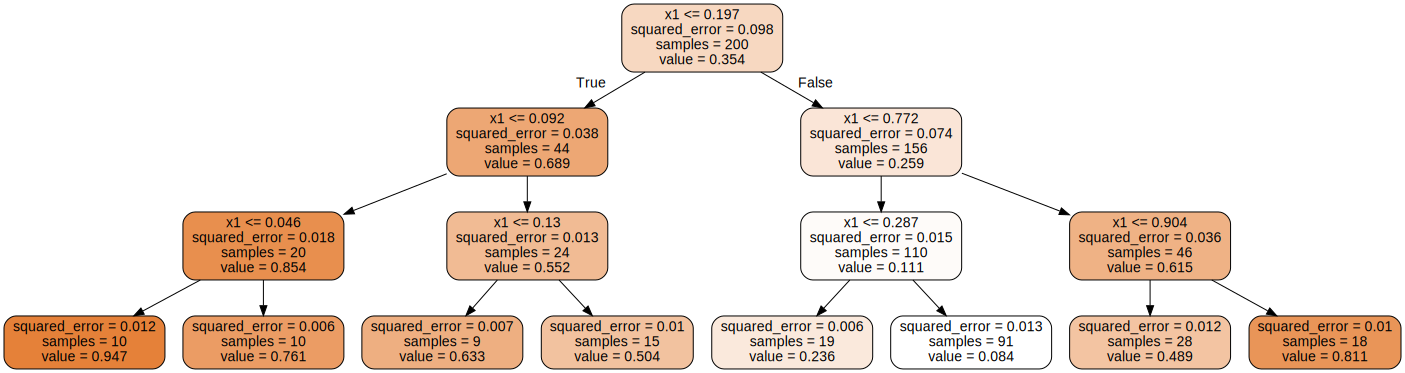

In [30]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks.

Without any regularization (i.e., using the default hyperparameters),
you get the predictions on the left.

These predictions are obviously
overfitting the training set very badly. Just setting min_samples_leaf=10 results
in a much more reasonable model, represented on the right.

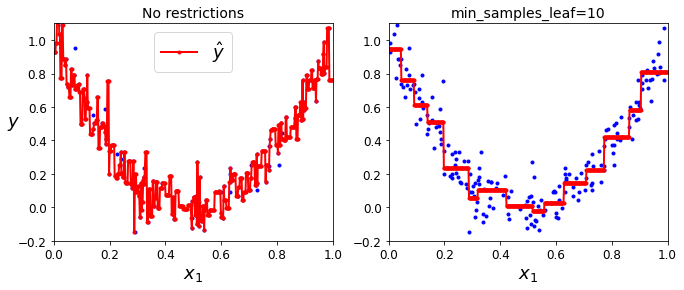

In [31]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

##Instability